In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load the data|
directory = 'ml-latest-small'


movies = pd.read_csv(os.path.join(directory, 'movies.csv'))
ratings = pd.read_csv(os.path.join(directory, 'ratings.csv'))
print(movies.shape)

ratings.head()

: 

In [12]:
# convert timestamp to datetime
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


In [17]:
ratings['timestamp'].diff()

0                      NaT
1        -1 days +23:35:44
2          0 days 00:16:17
3          0 days 00:26:31
4        -1 days +23:45:16
                ...       
100831   -1 days +15:23:57
100832     0 days 00:28:09
100833     4 days 21:29:16
100834   -5 days +01:28:25
100835     0 days 00:01:03
Name: timestamp, Length: 100836, dtype: timedelta64[ns]

,userId,movieId,rating,timestamp,long-term
0,1,1,4.0,2000-07-30 18:45:03,False
1,1,3,4.0,2000-07-30 18:20:47,False
2,1,6,4.0,2000-07-30 18:37:04,False
3,1,47,5.0,2000-07-30 19:03:35,False
4,1,50,5.0,2000-07-30 18:48:51,False


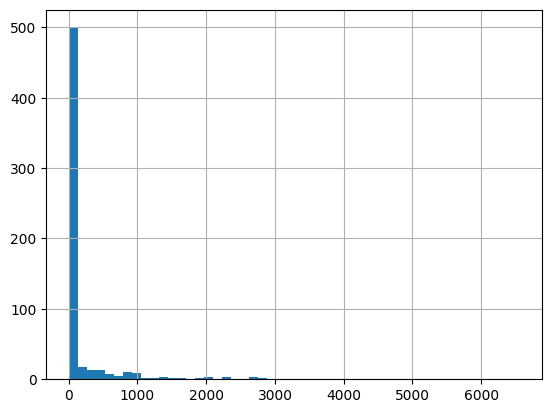

In [45]:
# define time between last rating and first rating for a user. group by user
def time_between_ratings(group):
    first_ratings = group['timestamp'].min()
    last_ratings = group['timestamp'].max()
    return last_ratings - first_ratings

# groupy by user
time_between_ratings = ratings.groupby('userId').apply(time_between_ratings)

# plot the time between ratings 
time_between_ratings.dt.days.hist(bins=50)

# make binary column for if the user has time between ratings greater than 1 year
time_between_ratings = time_between_ratings.dt.days
time_between_ratings = time_between_ratings > 365
time_between_ratings.value_counts()

# merge with ratings
ratings = ratings.merge(time_between_ratings.rename('long-term'), left_on='userId', right_index=True)
ratings.rename(columns={'timestamp_x': 'timestamp', 'timestamp_y': 'time_between_ratings'}, inplace=True)
ratings.head()

<BarContainer object of 2 artists>

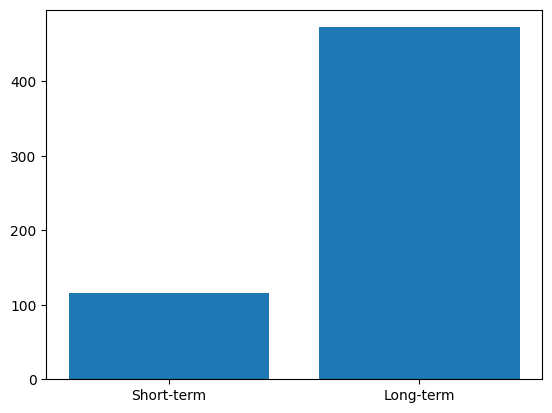

In [48]:
# plot the difference in the number of ratings between long-term and short-term users
mean_short_term = ratings[ratings['long-term'] == False].groupby('userId').size().mean()
mean_long_term = ratings[ratings['long-term'] == True].groupby('userId').size().mean()

plt.bar(['Short-term', 'Long-term'], [mean_short_term, mean_long_term])

In [5]:
import pandas as pd

data = {
    "Simulator": ["RecoGym", "MARS-Gym", "RL4RS", "RecSim", "Virtual-TB", "SOFA", "OBP", "SARDINE"],
    "RT1": ["~", "", "~", "✔", "✔", "✔", "✔", "✔"],
    "RT2": ["", "", "~", "", "✔", "", "✔", "✔"],
    "RT3": ["", "", "", "~", "✔", "", "✔", "✔"],
    "RT4": ["✔", "", "~", "~", "", "", "✔", "✔"],
    "Interpretability": ["±", "−", "−", "±", "−", "+", "+", "+"],
    "Effect isolation": ["+", "−", "+", "−", "−", "+", "+", "+"],
    "Configurability": ["+", "−", "+", "−", "−", "+", "+", "+"]
}

df = pd.DataFrame(data)

# save as excel
df.to_excel('comparison.xlsx', index=False)

In [4]:
pip install openpyxl

     -------------------------------------- 251.3/251.3 kB 7.8 MB/s eta 0:00:00
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
